# Project Wine

## Overview
*
This project aims to forecast the quality of wine by analyzing the key factors that influence its overall quality. We explore the relationships between various chemical properties and wine quality, utilizing data from data.world for both white and red wines. Through cluster analysis and regression models, we aim to identify the significant drivers of wine quality and create a machine learning model for quality predictio*n.

## Table of Contents
- [Imports](#imports)
- [Data Acquisition](#data-acquisition)
- [Data Preparation](#data-preparation)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Feature Engineering](#feature-engineering)
- [Modeling](#modeling)
- [Evaluation](#evaluation)
- [Conclusion](#conclusion)
- [Next Steps](#next-steps)

## Goal

The primary objectives of this project are:

- Identify the drivers of wine quality.
- Utilize these identified drivers to develop a machine learning model capable of predicting the quality of wine.


# Imports

In [1]:
# local imports
import wrangle as w
import explore as e
import evaluate as ev
import model as m

# Data Acquisition


- Data acquired from data.world/food/wine-quality.
- Initial acquisition date: 20 Sep 2023.
- Original dataset contained 6,497 rows and 12 columns before cleaning.
- Each row represents a sample of wine, and each column represents measurements related to the wine's composition and quality.

# Data Preparation

- Renamed columns to enhance readability.
- Checked and ensured that column data types were appropriate.
- Kept outliers in the data.
- Created custom features to enrich the dataset.
- Encoded categorical variables, including the creation of dummy variables where necessary.
- Split the data into training, validation, and test sets with an approximate split of 70/15/15.
- Scaled the data using Min-Max Scaling for modeling purposes.

In [2]:
# acquire, clean, and prepare the data
df = w.acquire_wine()

### Quick view of data,

In [3]:
# First 5 rows of data
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


# Exploratory Data Analysis


Questions asked and answered:

1. Is alcohol dependent on quality of wine?  
2. Is there a statistically significant difference in the mean alcohol percentage between wines of low quality and high quality?  
3. Are citric acid levels correlated with fixed acidity?  
4. What significance do these clusters hold for wine quality or production processes?  

In [4]:
df = w.clean_wine()

**Question 1: Is alcohol dependent on the quality of wine?  **

Hypotheses:

**($H0$): The quality of wine is NOT dependent on the alcohol content.**
**($Ha$): The quality of wine is dependent on the alcohol content.**



----------------------------------------------------------------------------------------------------

Chi2 Statistic: 899.73

P-Value: 1.91e-193



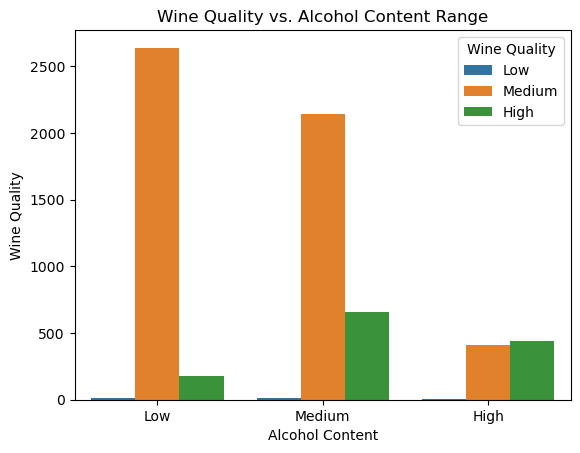


We reject the null hypothesis with a p-value of 1.91e-193.






In [5]:
# analysis 1 visualization
e.analysis_1(df, 'alcohol_bins', 'quality_bins')

## **Takeaway:**  
### We can determine that the quality of wine  is not dependent on the alcohol content of the wine. We can also clearly see that most of the wine in the dataset is comprised of medium quality wine which ranges from a rank of 4 to 6.

## Question 2. - **Is there a statistically significant difference in the mean alcohol percentage between wines of low quality and high quality?**



----------------------------------------------------------------------------------------------------

P_Value: 1.0


T-Statistic: 0.0



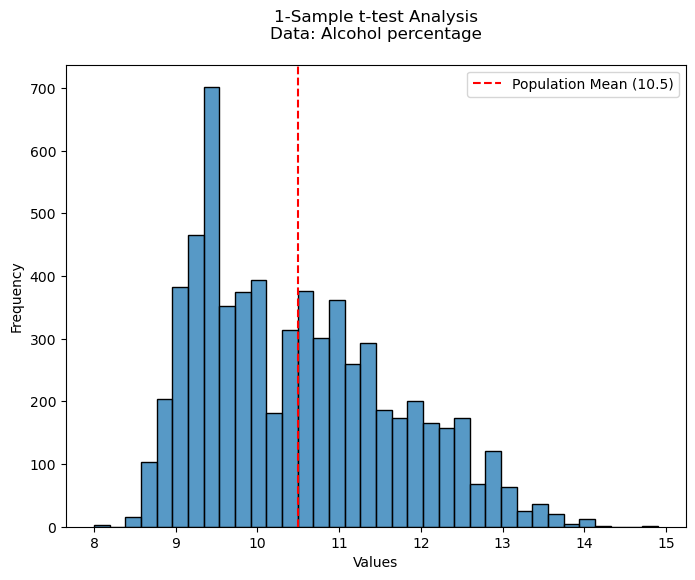


We failed to reject the null hypothesis with a p-value of 1.00e+00.


In [6]:
# analysis 2 visualization
e.analysis_2(df, 'alcohol', a=0.05)

## Takeaway:

### **The mean alcohol percentage of low-quality wines is equal to the mean alcohol percentage of high-quality wines. a larger frequency of wine is more grouped on te 9.5 to 11 range of values, so the mean value make sense for alcohol content.**

# Question 3. - **Are citric acid levels correlated with fixed acidity?**  

**($H0$): There is no linear correlation between citric acid levels and fixed acidity.**  

**($Ha$): There is a linear correlation between citric acid levels and fixed acidity.**


----------------------------------------------------------------------------------------------------

r_value: 0.3244

p_value: 4.19e-159



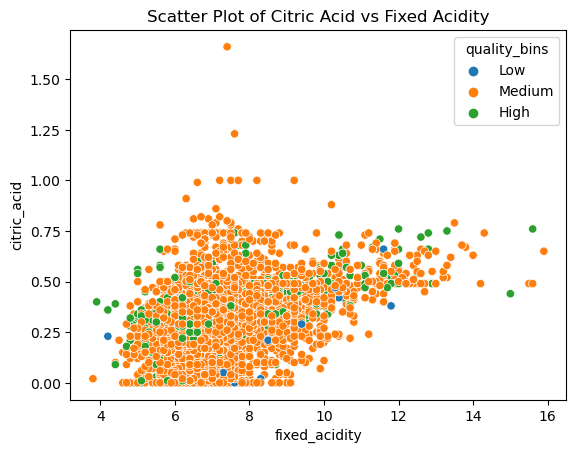


We reject the null hypothesis with a p-value of 4.19e-159.


In [7]:
# Analysis 3 visualization
e.analysis_3(df, 'fixed_acidity', 'citric_acid')

### **Takeaway:** 
### The stats test Rejected the Null Hypothesis and we can draw our conclusions that there is a strong linear correlation between property citric acid and fixed acidity over each quality type of wine

# Question 4 - **What significance do these clusters hold for wine quality or production processes?**

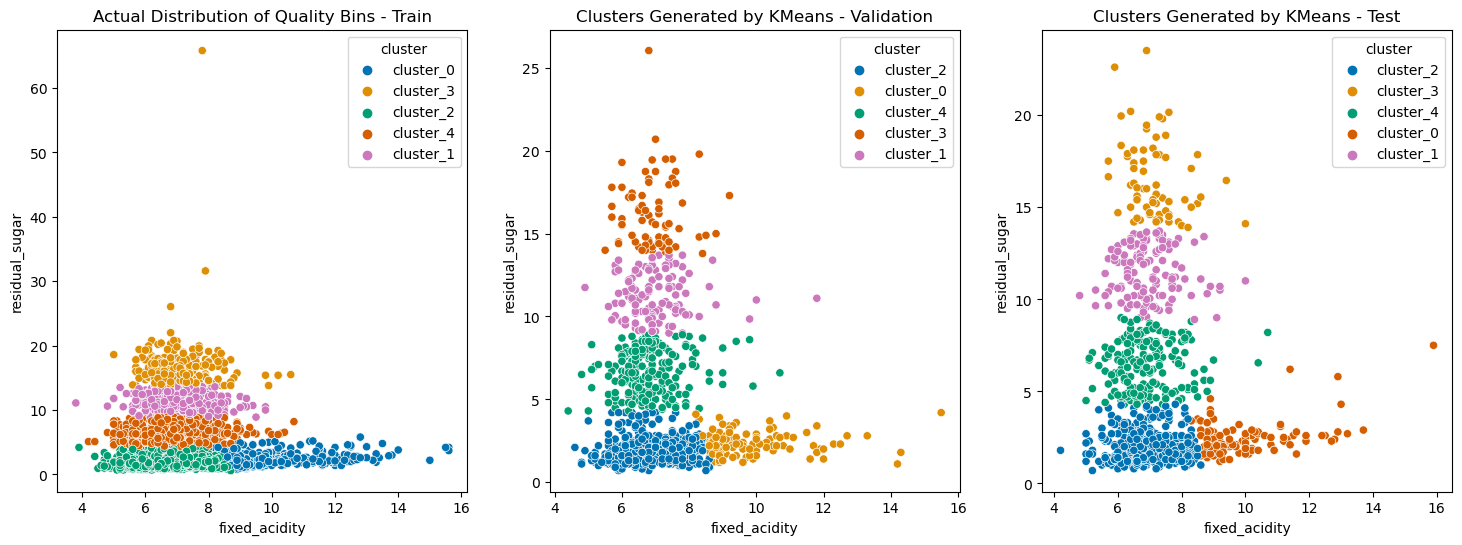

In [8]:
# data split and scale
train, val, test = w.wrangle_wine()

# analysis 4 visualization
e.analysis_4(train, val, test, 'fixed_acidity', 'residual_sugar', 'density')

### **Takeaway:** 
###  Discovered distinct clusters when analyzing 'fixed_acidity' and 'residual_sugar', with the hue of 'density' revealing significant segment relationships.

# Explore Summary

- Independance on Quality and Alcohol intake.
    - The data suggests that the quality of wine isn't directly correlated with its alcohol content.
- Majority of Medium Quality Wines.
    - Indicates a predominant market offering of medium-quality wines.
- Alcohol Percentage Parity.
    - Mean alcohol percentages of both low-quality and high-quality wines are on par.
- Statistical Insights on Acidity.
    - Significant linear relationship between the properties of citric acid and fixed acidity.
- Clustering Analysis.
    - Distinct clusters especially evident when analyzing variables like 'fixed_acidity' and 'residual_sugar'.

# Feature Engineering


## Features for modeling

* *quality : Is our taget variable* 

### **Some features that may be useful:**  
* *alcohol*
* *volatile_acidity*
* *sulphates*
* *citric_acid*
* *free_sulfur_dioxide*
* *ph*
* *fixed_acidity*
* *tesidual_sugar*
* *chlorides*
* *density*
* *Quality*


## For modeling with clusters, we will create dummies for the cluster features:
- We will create dummies for the cluster
    - Fixed acidity
    - Residual Sugar
    - Density

# Modeling

### Evaluation Metric
- The primary evaluation metrics for the models are:
  - Root Mean Squared Error (RMSE)
  - Calculated Model Significance

### Data Expansion
- Given more time, additional data could be gathered to improve model performance.
- Experimentation with hyperparameter configurations can lead to better significance and lower RMSE.

### Target Feature
- The target feature for the models is `quality`.

### Baseline RMSE
- The baseline RMSE is approximately .072.

### Models and Hyperparameters
- Two different sets of hyperparameters will be used for model development, each optimized for different features:
  1. RandomForestRegressor (hyperparameters)
  2. XGBoostRegressor (early stopping rounds, eval set)
  3. LinearRegression (polynomial features, hyooer)

### Model Evaluation
- Models will be developed and evaluated on the training and validation datasets.

### Final Model Selection
- The best-performing model, as determined by RMSE and Model Significance on the validation set, will be selected.

### Test Dataset
- The selected best model will be evaluated on the test dataset for final performance assessment.ized and easier to understand.


## Baseline Model Root Mean Squared Error

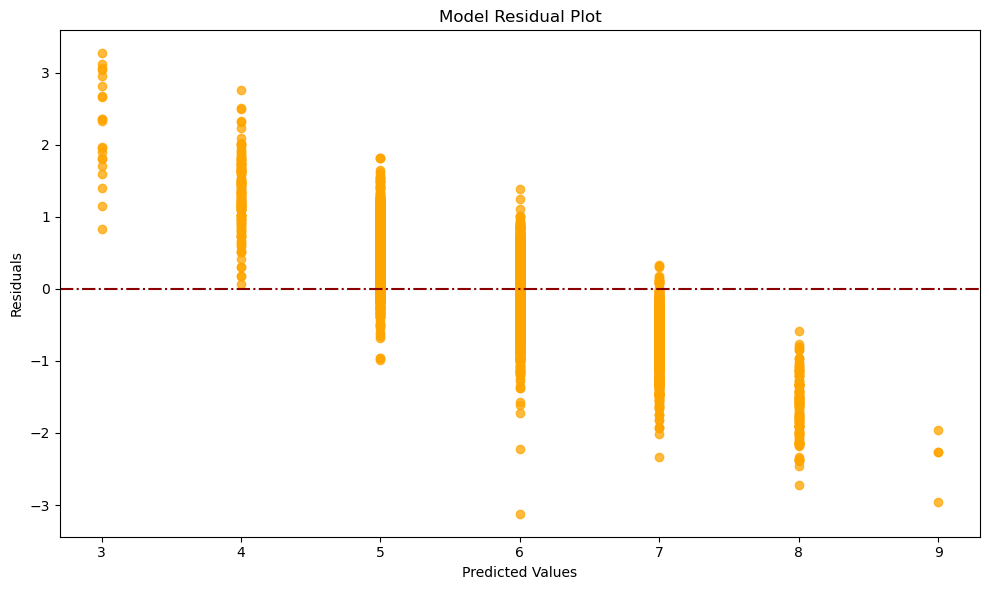


-------------------------------------

Model RMSE: 0.72


-------------------------------------

Baseline RMSE: 0.88


-------------------------------------


In [9]:
# data split and scale
m.baseline_model(train, 'quality', train, val, test, 'fixed_acidity', 'residual_sugar', 'density')

In [10]:
train, val, test = m.modeling_features(train, val, test)

## Best of 3 model configurations

###  selectkbest used for feature importance selection

In [11]:
# selectKBest for most top 5 features
selected_features = m.select_k_features(train, 'quality')
selected_features.to_list()

['alcohol',
 'alcohol_ph_ratio',
 'quality_bins_Medium',
 'quality_bins_High',
 'alcohol_bins_Low']

### Used in model Evaluation and they did not offer promising results.

In [12]:
# Split data into X and y for train, val, test 
X_train, y_train = m.xy_split(train, 'quality')  
X_val, y_val = m.xy_split(val, 'quality') 
X_test, y_test = m.xy_split(test, 'quality') 

## Model 1

In [14]:
# ### RandomForestRegression Model
m.model_1(X_train, y_train, X_val, y_val)


-------------------------------------

Training RMSE: 0.16

-------------------------------------

Validation RMSE: 0.44

-------------------------------------

Training R-squared (R2): 0.97

-------------------------------------

Validation R-squared (R2): 0.74

-------------------------------------

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Model 2

In [15]:
### XGBRegressor Model
m.model_2(X_train, y_train, X_val, y_val, params=None)


-------------------------------------

Train RMSE: 0.40

-------------------------------------

Train R-squared (R2): 0.79

------------------------------------

Validation RMSE: 0.47

-------------------------------------

Validation R-squared (R2): 0.70

-------------------------------------

Best Score: 0.47


## Model 3

In [16]:
### Polynomial Features LinearRegression Model 
m.model_3(X_train, y_train, X_val, y_val)


-------------------------------------
The train RMSE is 0.41.


-------------------------------------
The validation RMSE is 17975049711.78.



-------------------------------------

Training R-squared (R2): 0.78

-------------------------------------

Validation R-squared (R2): -434351745247960694784.00


## Best on Test

#### Random Forest Regression Model

In [13]:
# final assessment on test data using RandomForestRegressor model
m.best_model(X_train, y_train, X_test, y_test)


-------------------------------------

Train RMSE: 0.40

-------------------------------------

Train R-squared (R2): 0.79

------------------------------------

Test RMSE: 0.47

-------------------------------------

Test R-squared (R2): 0.69

-------------------------------------

Best Score: 0.47


# Model Summary

### RandomForestRegression Model
- The RandomForestRegression model displayed overfitting, but it resulted in fair results.
  
### Polynomial Features LinearRegression Model
- The Polynomial Features LinearRegression model exhibited better generalization, and r2 score were favorable as well.

### XGBRegressor Model
- The XGBRegressor model, with hyperparameter tuning, performed the best with the following metrics:

  - RMSE: 0.47
  - R2 Score: 0.69

# Conclusion

## Takeaways and Key Findings

- Home details such as the calculated area of the home, lot area, number of bedrooms, number of bathrooms, and year built are significant drivers of home value.
- Calculated area is the most important feature across all factors.
- Higher-priced and larger single residential family properties appear to be concentrated in Ventura County, while smaller homes are spread across Orange and Los Angeles counties.
- Larger living areas correlate with higher property values.
- Location plays a crucial role in property value.


## Model Improvement
- The model still requires further improvement.

# Recommendations and Next Steps

- If the data contained detailed of hard appliances attached or amenities homebuyers seek in single family residential properties maybe this could affect property value.

- Given more time, the following actions could be considered:
  - Gather more data to improve model performance.
  - Feature engineer new variables to enhance model understanding.
      - trasnaction dates for value over time
  - Fine-tune model parameters for better performance.